# TP4 - Analyse de données ouvertes de la ville de Montréal - Criminalité
Voici la source de nos donnees http://donnees.ville.montreal.qc.ca/dataset/actes-criminels

*Nous avons du separer les donnees en deux fichiers csv, car le fichier etait trop lourd, donc pycharm ne voulait pas le traiter.

## Voici les étapes préliminaires que nous avons fait avant de commencer nos analyses :

In [9]:
# On commence ici par importer les extentions dont nous allons avoir besoin au cours de notre analyse.
import pandas
import matplotlib.pyplot as plt

In [10]:
# On définie des fonctions qui seront utiles tout au long de l'analyse :

## Premièrement la fonction imprimer_histogramme nous serviras à afficher l'histogramme selon les différents paramètres qui seront utiles.
### Nous avons décidé de définir la fonction afin de rendre le code plus beau et moins chargé, vu le fait que nous allons afficher 3 fois des histogrammes.
def imprimer_histogramme(data_frame, titre, axe_des_X=None, axe_des_Y=None, ajustement_bas=None, ajustement_haut=None, ajustement_gauche=None, ajustement_droite=None):
    data_frame.plot(kind="bar", title=titre)
    plt.xlabel(axe_des_X)  # On nomme l'axe des X
    plt.ylabel(axe_des_Y)  # On nomme l'axe des Y
    plt.subplots_adjust(bottom=ajustement_bas, top=ajustement_haut, left=ajustement_gauche, right=ajustement_droite)  # On ajuste les dimensions du graphique afin de bien afficher les titres
    return plt.show()  # On fait afficher l'histogramme

## Deuxièmement, nous avons créé la fonction imprimer statistiques qui fait seulement un describe sur un dataframe. Ceci est plus pour l'esthétique qu'autre choses.
def imprimer_statistiques(data_frame):
    print(data_frame.describe())

In [11]:
# Avec pandas, on lis les donnees du csv de 2019 et 2020.
donnees_criminalite_2019 = pandas.read_csv("donnees_criminalite_csv_2019.csv", delimiter=";", parse_dates=["DATE"])
donnees_criminalite_2020 = pandas.read_csv("donnees_criminalite_csv_2020.csv", delimiter=";", parse_dates=["DATE"])

In [12]:
# Ensuite, on met les données dans un dataframe afin de pouvoir les utiliser dans nos analyses
## Pour 2019
donnees_criminalite_2019_data_frame = pandas.DataFrame(data=donnees_criminalite_2019)
## Pour 2020
donnees_criminalite_2020_data_frame = pandas.DataFrame(data=donnees_criminalite_2020)

In [13]:
# On utilise la fonction drop afin d'enlever les colones inutiles dans notre data frame
## Pour 2019
donnees_criminalite_2019_data_frame = pandas.DataFrame.drop(donnees_criminalite_2019_data_frame, columns= ["PDQ", "X", "Y", "LONGITUDE", "LATITUDE"])
## Pour 2020
donnees_criminalite_2020_data_frame = pandas.DataFrame.drop(donnees_criminalite_2020_data_frame, columns= ["PDQ", "X", "Y", "LONGITUDE", "LATITUDE"])

In [14]:
# Étant donné que nos analyses seront toujours sur une base mensuelle, nous allons tout de suite convertir le format date actuel en mois uniquement.
# NOTE : Il en va de soi que 1 = Janvier, 2 = Février, 3= Mars, 4= Avril, etc.
## Pour 2019
pandas.DataFrame(donnees_criminalite_2019_data_frame)['DATE'] = pandas.DataFrame(donnees_criminalite_2019_data_frame)['DATE'].dt.month
## Pour 2020
pandas.DataFrame(donnees_criminalite_2020_data_frame)['DATE'] = pandas.DataFrame(donnees_criminalite_2020_data_frame)['DATE'].dt.month

## PREMIÈRE ANALYSE - NOMBRE TOTAL D'ACTES CRIMINELS PAR MOIS :
Avec cette analyse, on tente de se faire un première vision générale de la situation avant de pousser nos analyses.

On tente de démontrer que le confinement à un lien avec la diminution du nombre de crimes sur l'ile de Montréal en comparant avec les données à pareille date l'an dernier.

In [15]:
# ÉTAPE 1: Avec le groupby ici on compte le nombre d'actes criminels en les groupant par mois :

## POUR L'ANNÉE 2019
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois.
crimes_mensuel_2019_data_frame = pandas.DataFrame(donnees_criminalite_2019_data_frame).groupby(['DATE']).agg(
    Nb_Infraction_par_mois_2019=('CATEGORIE', "count"))
### Afficher seulement les 4 premiers mois de 2019 pour comparer avec les 4 premiers mois de 2020.
crimes_mensuel_2019_data_frame = pandas.DataFrame(crimes_mensuel_2019_data_frame).drop(crimes_mensuel_2019_data_frame.index[4:12])

## POUR L'ANNÉE 2020
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois.
crimes_mensuel_2020_data_frame = pandas.DataFrame(donnees_criminalite_2020_data_frame).groupby(['DATE']).agg(
    Nb_Infraction_par_mois_2020=('CATEGORIE', "count"))

In [16]:
# ÉTAPE 2: Avec la fonction "merge", on regroupe le dataframe de 2019 avec celui de 2020 afin de mieux analyser les données.
crimes_mensuels_2019_2020_data_frame_merged = pandas.merge(left=crimes_mensuel_2019_data_frame, right=crimes_mensuel_2020_data_frame, on='DATE')

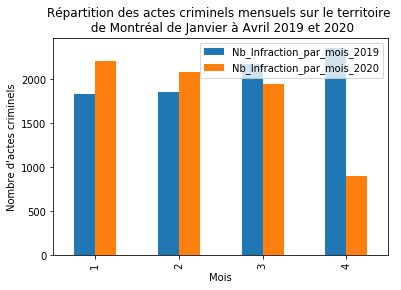

In [17]:
# ÉTAPE 3: Avec le package matplotlib.pyplot, nous allons représenter graphiquement les données afin de mieux les comparer.
## ANNÉE 2019-2020 (Janvier à Avril) - Nous utilisons les données que nous avons regroupé à l'étape 2. Nous appelons la fonction définie au début du code afin d'afficher un histogramme.
imprimer_histogramme(data_frame=crimes_mensuels_2019_2020_data_frame_merged, titre="Répartition des actes criminels mensuels sur le territoire \n de Montréal de Janvier à Avril 2019 et 2020",
                     axe_des_X="Mois", axe_des_Y="Nombre d'actes criminels")

In [18]:
# ÉTAPE 4: Nous imprimons les statistiques que nous allons pouvoir analyser.
imprimer_statistiques(crimes_mensuels_2019_2020_data_frame_merged) # Appel la fonction définie plus haut

       Nb_Infraction_par_mois_2019  Nb_Infraction_par_mois_2020
count                     4.000000                     4.000000
mean                   2056.500000                  1788.250000
std                     252.866895                   599.875751
min                    1839.000000                   902.000000
25%                    1850.250000                  1691.000000
50%                    2016.500000                  2021.500000
75%                    2222.750000                  2118.750000
max                    2354.000000                  2208.000000


## DEUXIÈME ANALYSE - NOMBRE TOTAL D'ACTES CRIMINELS MENSUELS PAR QUART :
Avec cette analyse, on tente de voir s'il y a eu un changement au niveau du temps de la journée ou les actes criminels sont produit.

En d'autres mots, est-ce que le confinement vient modifier l'habitude des criminels en ce qui a trait au temps où ils comettent leur crimes?

In [19]:
# ÉTAPE 1: Avec le groupby ici on compte le nombre d'actes criminels en les groupant par quart et par mois :

## POUR L'ANNÉE 2019
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois et par quart.
crimes_mensuels_par_quart_2019_data_frame = pandas.DataFrame(donnees_criminalite_2019_data_frame).groupby(['DATE', 'QUART']).agg(
    Nb_Infraction_Par_Quart_2019=('CATEGORIE', "count"))
### Afficher seulement les 4 premiers mois de 2019 pour comparer avec les 4 premiers mois de 2020.
crimes_mensuels_par_quart_2019_data_frame = pandas.DataFrame(crimes_mensuels_par_quart_2019_data_frame).drop(crimes_mensuels_par_quart_2019_data_frame.index[12:36])

## POUR L'ANNÉE 2020
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois et par quart.
crimes_mensuels_par_quart_2020_data_frame = pandas.DataFrame(donnees_criminalite_2020_data_frame).groupby(['DATE', 'QUART']).agg(
    Nb_Infraction_Par_Quart_2020=('CATEGORIE', "count"))

In [20]:
# ÉTAPE 2: Avec la fonction "merge", on regroupe le dataframe de 2019 avec celui de 2020 afin de mieux analyser les données.
crimes_mensuels_par_quart_2019_2020_data_frame_merged = pandas.merge(left=crimes_mensuels_par_quart_2019_data_frame, right=crimes_mensuels_par_quart_2020_data_frame, on=['DATE', 'QUART'])

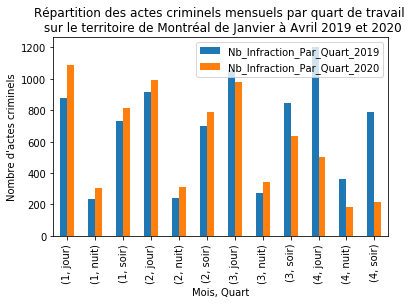

In [21]:
# ÉTAPE 3: Avec le package matplotlib.pyplot, nous allons représenter graphiquement les données afin de mieux les comparer.
## ANNÉE 2019-2020 (Janvier à Avril) - Nous utilisons les données que nous avons regroupé à l'étape 2. Nous appelons la fonction définie au début du code afin d'afficher un histogramme.
imprimer_histogramme(data_frame=crimes_mensuels_par_quart_2019_2020_data_frame_merged, titre="Répartition des actes criminels mensuels par quart de travail \n sur le territoire de Montréal de Janvier à Avril 2019 et 2020",
                     axe_des_X="Mois, Quart", axe_des_Y="Nombre d'actes criminels", ajustement_bas=0.19)

In [22]:
# ÉTAPE 4: Nous imprimons les statistiques que nous allons pouvoir analyser.
imprimer_statistiques(crimes_mensuels_par_quart_2019_2020_data_frame_merged) # Appel la fonction définie au début du code

       Nb_Infraction_Par_Quart_2019  Nb_Infraction_Par_Quart_2020
count                     12.000000                     12.000000
mean                     685.500000                    596.083333
std                      331.668098                    327.606321
min                      233.000000                    181.000000
25%                      339.750000                    309.750000
50%                      760.500000                    568.500000
75%                      884.750000                    854.750000
max                     1203.000000                   1088.000000


# TROISIEME ANALYSE - CRIMES MENSUELS TOTAUX PAR CATÉGORIE :
Avec cette analyse, on tente de déterminer si le confinement a peut avoir un lien avec la "popularité" des crimes commis (selon la catégorie).

In [23]:
# ÉTAPE 1: Avec le groupby ici on compte le nombre d'actes criminels en les groupant par catégorie et par mois:

## POUR L'ANNÉE 2019
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois et par catégorie.
crimes_mensuels_par_categorie_2019_data_frame = pandas.DataFrame(donnees_criminalite_2019_data_frame).groupby(['DATE', 'CATEGORIE']).agg(
    Nb_Infraction_Par_Categorie_2019=('CATEGORIE', "count"))
### Afficher seulement les 4 premiers mois de 2019 pour comparer avec les 4 premiers mois de 2020 (drop index).
crimes_mensuels_par_categorie_2019_data_frame = pandas.DataFrame(crimes_mensuels_par_categorie_2019_data_frame).drop(crimes_mensuels_par_categorie_2019_data_frame.index[22:68])

## POUR L'ANNÉE 2020
### On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois et par catégorie.
crimes_mensuels_par_categorie_2020_data_frame = pandas.DataFrame(donnees_criminalite_2020_data_frame).groupby(['DATE', 'CATEGORIE']).agg(
    Nb_Infraction_Par_Categorie_2020=('CATEGORIE', "count"))

In [24]:
# ÉTAPE 2: Avec la fonction "merge", on regroupe le dataframe de 2019 avec celui de 2020 afin de mieux analyser les données.
crimes_mensuels_par_categorie_2019_2020_data_frame_merged = pandas.merge(left=crimes_mensuels_par_categorie_2019_data_frame, right=crimes_mensuels_par_categorie_2020_data_frame, on=['DATE', 'CATEGORIE'])

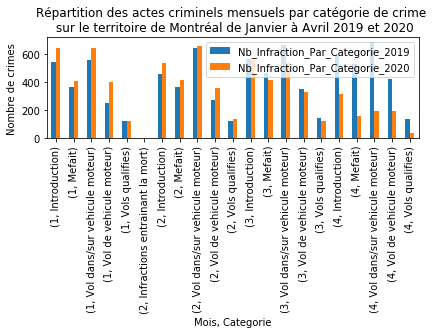

In [25]:
# ÉTAPE 3: Avec le package matplotlib.pyplot, nous allons représenter graphiquement les données afin de mieux les comparer.
## ANNÉE 2019-2020 (Janvier à Avril) - Nous utilisons les données que nous avons regroupé à l'étape 2. Nous voulons un diagramme de type "histogramme". Appel la fonction imprimer_histogramme
imprimer_histogramme(data_frame=crimes_mensuels_par_categorie_2019_2020_data_frame_merged, titre="Répartition des actes criminels mensuels par catégorie de crime \n sur le territoire de Montréal de Janvier à Avril 2019 et 2020",
                     axe_des_X="Mois, Categorie", axe_des_Y="Nombre de crimes", ajustement_bas=0.56, ajustement_haut=0.91, ajustement_gauche=0.10, ajustement_droite=0.96)

In [26]:
# ÉTAPE 4: Nous imprimons les statistiques que nous allons pouvoir analyser.
imprimer_statistiques(crimes_mensuels_par_categorie_2019_2020_data_frame_merged) # Appel la fonction définie au début du code

       Nb_Infraction_Par_Categorie_2019  Nb_Infraction_Par_Categorie_2020
count                         21.000000                         21.000000
mean                         391.666667                        340.476190
std                          203.227295                        204.699931
min                            4.000000                          1.000000
25%                          251.000000                        161.000000
50%                          420.000000                        355.000000
75%                          556.000000                        533.000000
max                          682.000000                        653.000000
